In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [7]:
df=pd.read_csv(r"C:\Users\kurva\OneDrive\Desktop\wine-clustering.csv")

In [9]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
0,14.05,3.24,2.20,18.3,1.04,3.89,0.51,2.37,7.43,0.80,2.46,90,352
1,13.00,3.20,2.49,16.5,2.46,1.92,0.22,0.83,1.98,1.07,4.34,104,813
2,11.90,2.98,2.32,20.1,3.13,1.72,0.45,1.02,4.54,0.83,0.67,90,199
3,11.89,1.36,2.51,21.0,1.63,2.57,0.16,0.94,8.49,0.83,3.46,86,820
4,13.15,1.89,2.47,26.0,1.30,3.83,0.34,1.38,3.07,0.97,2.80,108,1188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.76,3.22,2.76,16.1,2.97,2.49,0.37,0.53,7.73,0.90,2.41,105,853
99996,12.59,2.75,2.23,23.8,2.79,3.80,0.42,0.56,6.25,1.19,1.67,97,505
99997,12.73,5.80,2.59,14.5,3.50,0.55,0.14,1.03,3.34,0.72,2.81,107,864
99998,12.72,3.33,2.51,19.9,2.93,2.32,0.45,0.66,7.74,0.48,0.73,99,618


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Alcohol               100000 non-null  float64
 1   Malic_Acid            100000 non-null  float64
 2   Ash                   100000 non-null  float64
 3   Ash_Alcanity          100000 non-null  float64
 4   Total_Phenols         100000 non-null  float64
 5   Flavanoids            100000 non-null  float64
 6   Nonflavanoid_Phenols  100000 non-null  float64
 7   Proanthocyanins       100000 non-null  float64
 8   Color_Intensity       100000 non-null  float64
 9   Hue                   100000 non-null  float64
 10  OD280                 100000 non-null  float64
 11  Magnesium             100000 non-null  int64  
 12  Proline               100000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 9.9 MB


In [13]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
0,14.05,3.24,2.20,18.3,1.04,3.89,0.51,2.37,7.43,0.80,2.46,90,352
1,13.00,3.20,2.49,16.5,2.46,1.92,0.22,0.83,1.98,1.07,4.34,104,813
2,11.90,2.98,2.32,20.1,3.13,1.72,0.45,1.02,4.54,0.83,0.67,90,199
3,11.89,1.36,2.51,21.0,1.63,2.57,0.16,0.94,8.49,0.83,3.46,86,820
4,13.15,1.89,2.47,26.0,1.30,3.83,0.34,1.38,3.07,0.97,2.80,108,1188


In [15]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
99995,12.76,3.22,2.76,16.1,2.97,2.49,0.37,0.53,7.73,0.90,2.41,105,853
99996,12.59,2.75,2.23,23.8,2.79,3.80,0.42,0.56,6.25,1.19,1.67,97,505
99997,12.73,5.80,2.59,14.5,3.50,0.55,0.14,1.03,3.34,0.72,2.81,107,864
99998,12.72,3.33,2.51,19.9,2.93,2.32,0.45,0.66,7.74,0.48,0.73,99,618
99999,13.36,3.70,2.34,23.8,1.92,1.53,0.24,1.59,2.55,0.96,3.12,117,957


In [17]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,13.006369,2.354693,2.367046,19.490714,2.296309,2.045107,0.361802,1.593870,5.082522,0.957222,2.615976,99.288900,747.923610
std,0.811346,1.084075,0.274663,3.333129,0.624999,0.967476,0.124023,0.570787,2.266200,0.228427,0.712221,14.261376,311.227502
min,9.500000,0.000000,1.210000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,41.000000,0.000000
25%,12.460000,1.590000,2.180000,17.200000,1.880000,1.360000,0.280000,1.210000,3.480000,0.800000,2.140000,90.000000,532.000000
50%,13.010000,2.340000,2.370000,19.500000,2.300000,2.030000,0.360000,1.590000,5.060000,0.960000,2.620000,99.000000,746.000000
75%,13.550000,3.090000,2.550000,21.700000,2.720000,2.710000,0.450000,1.980000,6.630000,1.110000,3.090000,109.000000,960.000000
max,16.140000,7.440000,3.550000,34.000000,5.100000,6.340000,0.960000,4.170000,15.640000,2.010000,5.680000,158.000000,2066.000000


In [21]:
df.shape

(100000, 13)

In [23]:
df.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Magnesium               0
Proline                 0
dtype: int64

In [27]:
df[df.duplicated()]


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline


In [29]:
df.any()

Alcohol                 True
Malic_Acid              True
Ash                     True
Ash_Alcanity            True
Total_Phenols           True
Flavanoids              True
Nonflavanoid_Phenols    True
Proanthocyanins         True
Color_Intensity         True
Hue                     True
OD280                   True
Magnesium               True
Proline                 True
dtype: bool

<Axes: xlabel='Alcohol', ylabel='Count'>

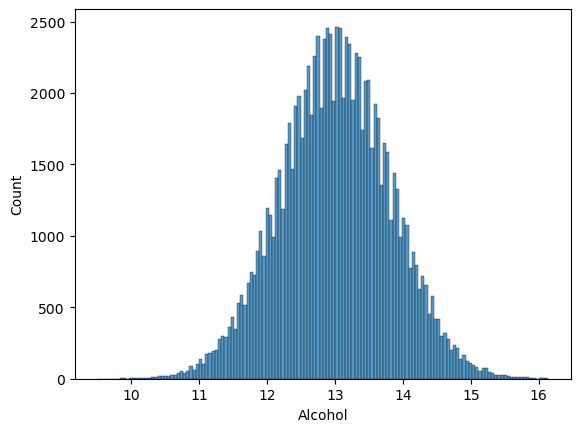

In [31]:
sns.histplot(x=df['Alcohol'])

<Axes: xlabel='Malic_Acid', ylabel='Count'>

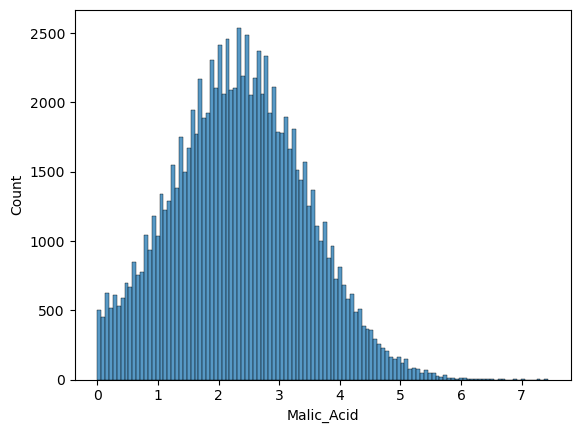

In [33]:
sns.histplot(x=df['Malic_Acid'])


<Axes: xlabel='Ash', ylabel='Count'>

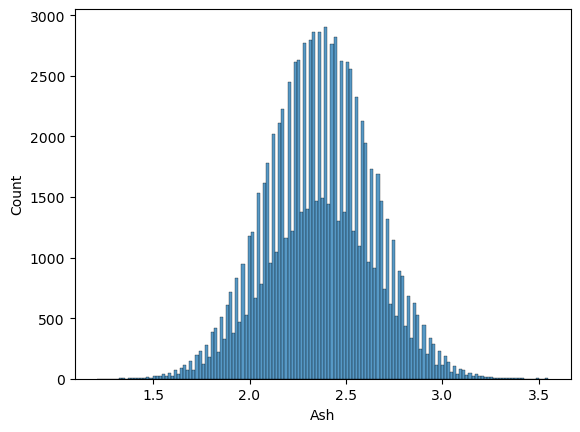

In [35]:
sns.histplot(x=df['Ash'])

<Axes: xlabel='Ash_Alcanity', ylabel='Count'>

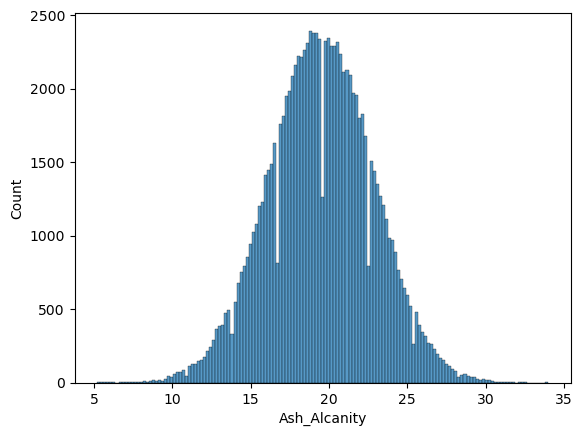

In [37]:
sns.histplot(x=df['Ash_Alcanity'])

In [1]:
sns.histplot(x=df['Total
             

SyntaxError: unterminated string literal (detected at line 1) (2045262090.py, line 1)

In [ ]:
##1)mention about problem statement
##2)talk about columns
##3)install the models and required libraries
##4)load data set 
##5)understand your data
##6)EDA
##i)univariate analysis
##ii)Bi-variate analysis
##iii)Multivariate analysis
##7)check the null-values or missing values
#i)treating the null values(fill with mean or median or mode)
#ii)drop null-values if they are less than 5%
##8)check the duplicates
##9)treating the outliers
##i)check the outliers
##ii)remove outliers
##iii)male the box plot before  and after the outliers
##10)Feature enginnering
##i)extract the features
##ii)select the features

